<h1 style="color: purple;"> ITCS 6162 KDD Group 4 Final Project </h1>

<h2 style="color: red;"> Introduction </h2>

### The Group 17 Team

Predicting Hazardous Near-Earth Objects (NEOs)

### Project Overview

Group 17 is investigating the prediction of hazardous Near-Earth Objects (NEOs) using machine learning techniques. NEOs are asteroids or comets that come close to Earth and could potentially pose a threat. By leveraging a dataset that includes various features of these celestial bodies, we aim to build a model that classifies NEOs as hazardous or non-hazardous. This project involves exploring and preparing data, training and evaluating machine learning models, and utilizing advanced tools like PyCaret for automated machine learning.

We will employ classification models, such as logistic regression and random forest, and compare them using metrics like accuracy and classification reports. Additionally, PyCaret will be used to streamline model comparison and selection. Our goal is to enhance our ability to identify potentially hazardous NEOs and contribute to planetary defense initiatives.

### Team Members
- **Venkata Lakshman Nimmagadda**
- **Gayathri Kaparthi**
- **Ram Sai Nimmagadda**
- **Deekshith Kumar Singirikonda**
- **Surya Vamsi Chandradhar Sidda**

### Problem Understanding

The primary challenge is to accurately predict whether a Near-Earth Object (NEO) poses a hazard to Earth. We aim to identify and classify NEOs based on features such as absolute magnitude, estimated diameter, relative velocity, and miss distance. This classification will help assess the risk posed by NEOs and inform potential planetary defense strategies.

### Relevant Domain

For more information on Near-Earth Objects and their impact:

- [NASA's Near-Earth Object Program](https://www.nasa.gov/planetarydefense/nearearthobjects)
- [The Planetary Society - Near-Earth Asteroids](https://www.planetary.org/space-policy-and-advocacy/asteroid-advocacy)
- [European Space Agency - NEO Coordination Centre](https://neo.ssa.esa.int/)

### Data Source

#### NEO Data Source

**Dataset Overview**
We will use the dataset titled "nearest-earth-objects(1910-2024).csv" for our research. This dataset includes details on Near-Earth Objects (NEOs) over a span of more than a century. It contains various features relevant to NEOs' physical and orbital properties. The data includes both numeric and categorical features, with some columns representing measurements and others providing categorical classifications.

**Features of Interest**
The dataset has several features, and our focus is on the following:

#### Key Features

- **Absolute Magnitude**: Measures the brightness of the NEO, representing its intrinsic luminosity.
- **Estimated Diameter Min**: The minimum estimated diameter of the NEO.
- **Estimated Diameter Max**: The maximum estimated diameter of the NEO.
- **Relative Velocity**: The speed of the NEO relative to Earth.
- **Miss Distance**: The closest distance the NEO will come to Earth.

#### Additional Features

- **Id**: Unique identifier for each NEO.
- **Name**: The name or designation of the NEO.
- **Close Approach Date**: The date on which the NEO approaches Earth.
- **Orbit Class**: Classification of the NEO's orbit (e.g., Apollo, Amor).

**Data Source Link**
For more details, you can access the dataset at [NASA's Near-Earth Object Data](https://example-link-to-dataset.com).

### Data Analysis

#### Profiling and Preliminary Observations

We began our analysis with an extensive review of the dataset using the Pandas Profiling tool. This provided us with a comprehensive summary, including data types, distribution of values, and missing data information. The profiling revealed that our dataset is clean with no missing values or duplicate rows. However, it also highlighted that the target variable, `is_hazardous`, is imbalanced with a higher number of non-hazardous NEOs compared to hazardous ones. This imbalance could potentially affect the performance of our classification models.

#### Visualizations

To better understand the dataset, we generated several visualizations:

- **Distribution of Hazard Status**: A bar plot was created to show the number of hazardous vs. non-hazardous NEOs. This visualization emphasized the imbalance in our target variable.
- **Histogram of Estimated Diameter**: A histogram provided insights into the distribution of the estimated diameters of NEOs.
- **Scatter Plot of Relative Velocity vs. Miss Distance**: This scatter plot helped us visualize the relationship between the NEO’s speed and its closest approach to Earth.
- **Box Plot of Estimated Diameter by Hazard Status**: We used a box plot to compare the estimated diameters of hazardous and non-hazardous NEOs.
- **Correlation Heatmap**: A heatmap was used to visualize the correlations between different features, highlighting that features like absolute magnitude, estimated diameter, and miss distance have notable correlations with each other.

#### Experimentation

In our experimentation phase, we trained and evaluated several models:

- **Logistic Regression**: We assessed its performance in predicting hazardous NEOs and found it provided a solid baseline for comparison.
- **Random Forest Classifier**: This model was also evaluated for its accuracy and effectiveness in handling the imbalanced data.
- **PyCaret**: Utilizing PyCaret allowed us to automate the model comparison process and identify the best-performing model. 

Through these experiments, we aimed to address the class imbalance and determine the most effective model for predicting hazardous NEOs. Our analysis and visualizations provided valuable insights into the data and helped in refining our approach to modeling.

### Environment Setup and Library Imports
The code snippet below imports several Python libraries and sets up the environment for data analysis and visualization:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
#import ydata_profiling
import matplotlib.pyplot as plt

/var/folders/25/kk93hcp100534x3g9xg2559w0000gn/T/ipykernel_410/3918192481.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Dataset Loading and Initial Inspection
The following code snippet loads a dataset from a CSV file and displays the first few rows of the data:

In [4]:
# Load the dataset (if not done previously)
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')
# Display the first few rows
df.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

### Dataset Statistical Overview
The following code snippet provides a summary of the statistical properties of the dataset:

In [6]:
df.describe()

neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.352878       51060.662908   4.153535e+07  
std                  0.701869       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  
50%                  0.163697       47560.465474   4.332674e+07  
75%                  0.422708       66673.820614   5.933961e+07  
max                 83.953727      291781.106613   7.479865e+07

### Dataset Structure Overview
The following code snippet provides a concise overview of the dataset’s structure:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


### Data Profiling Report Creation and Display
The following code snippet creates a comprehensive data profiling report and saves it as an HTML file. 
It also displays the report directly within a Jupyter notebook:

In [10]:
# Generate the profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile_report.html")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Distribution of Hazardous vs. Non-Hazardous NEOs
The following code snippet counts and visualizes the distribution of hazardous versus non-hazardous Near-Earth Objects (NEOs) 
using a bar chart:

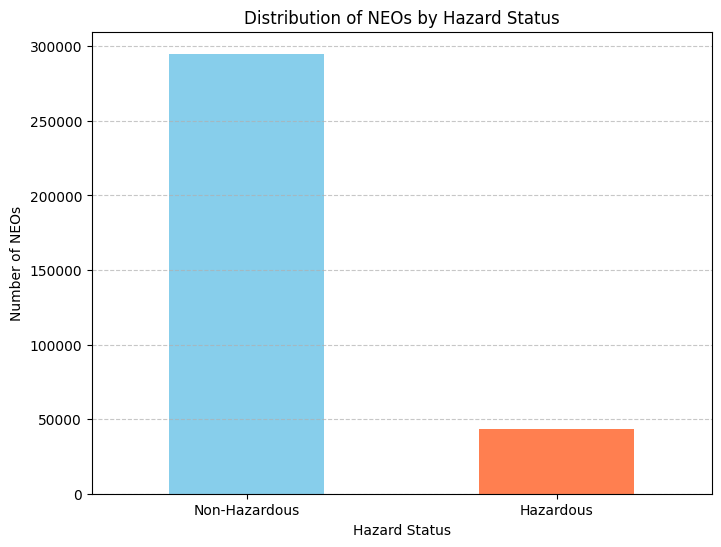

In [12]:
# Count the number of hazardous vs. non-hazardous NEOs
hazard_status_counts = df['is_hazardous'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
hazard_status_counts.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Distribution of NEOs by Hazard Status')
plt.xlabel('Hazard Status')
plt.ylabel('Number of NEOs')
plt.xticks(ticks=[0, 1], labels=['Non-Hazardous', 'Hazardous'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Histogram of Estimated Maximum Diameter of NEOs
The following code snippet creates a histogram to visualize the distribution of the estimated maximum diameter of 
Near-Earth Objects (NEOs):

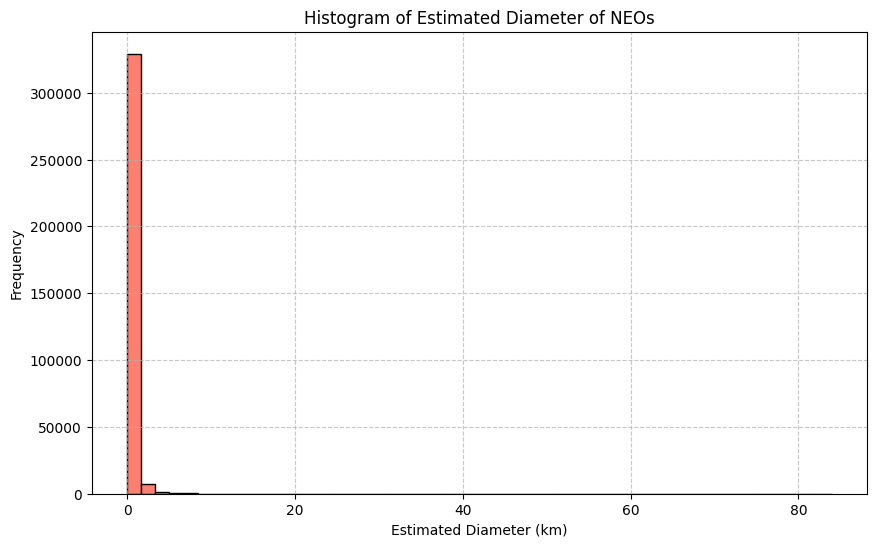

In [14]:
# Plot histogram of estimated diameter
plt.figure(figsize=(10, 6))
plt.hist(df['estimated_diameter_max'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Estimated Diameter of NEOs')
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Scatter Plot of Relative Velocity vs. Miss Distance of NEOs
The following code snippet creates a scatter plot to visualize the relationship between the relative velocity and miss distance of 
Near-Earth Objects (NEOs):

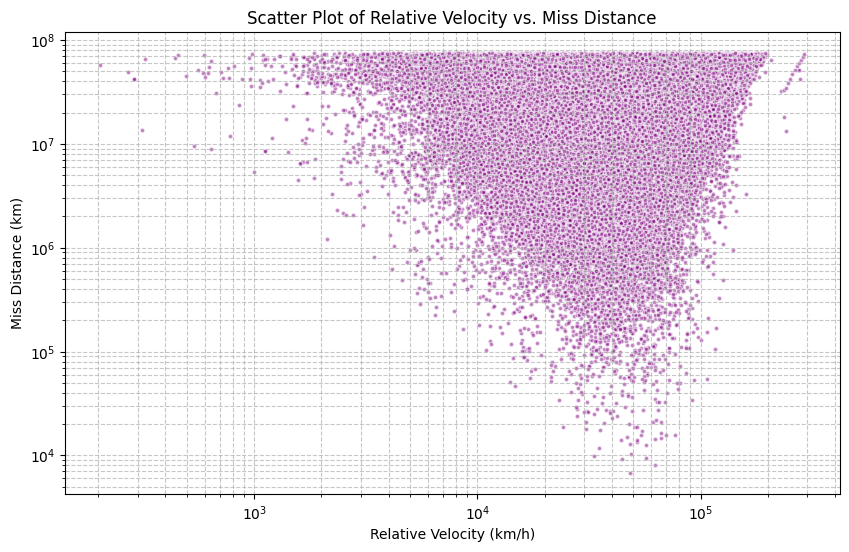

In [16]:
# Scatter plot of relative velocity vs. miss distance
plt.figure(figsize=(10, 6))
plt.scatter(df['relative_velocity'], df['miss_distance'], alpha=0.5, c='purple', edgecolors='w', s=10)
plt.title('Scatter Plot of Relative Velocity vs. Miss Distance')
plt.xlabel('Relative Velocity (km/h)')
plt.ylabel('Miss Distance (km)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

### Box Plot of Estimated Maximum Diameter by Hazard Status of NEOs
The following code snippet creates a box plot to compare the distribution of the estimated maximum 
diameter of Near-Earth Objects (NEOs) based on their hazard status:

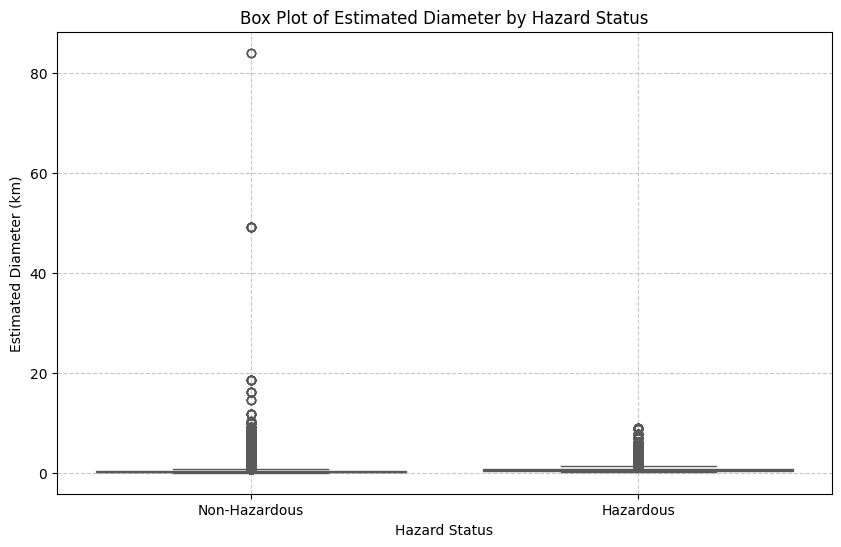

In [18]:
import seaborn as sns

# Box plot of estimated diameter by hazard status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='estimated_diameter_max', data=df, hue='is_hazardous', palette='Set2', legend=False)
plt.title('Box Plot of Estimated Diameter by Hazard Status')
plt.xlabel('Hazard Status')
plt.ylabel('Estimated Diameter (km)')
plt.xticks(ticks=[0, 1], labels=['Non-Hazardous', 'Hazardous'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Correlation Matrix Heatmap for Selected NEO Features
The following code snippet computes the correlation matrix for selected features of Near-Earth Objects (NEOs) and 
visualizes it using a heatmap:

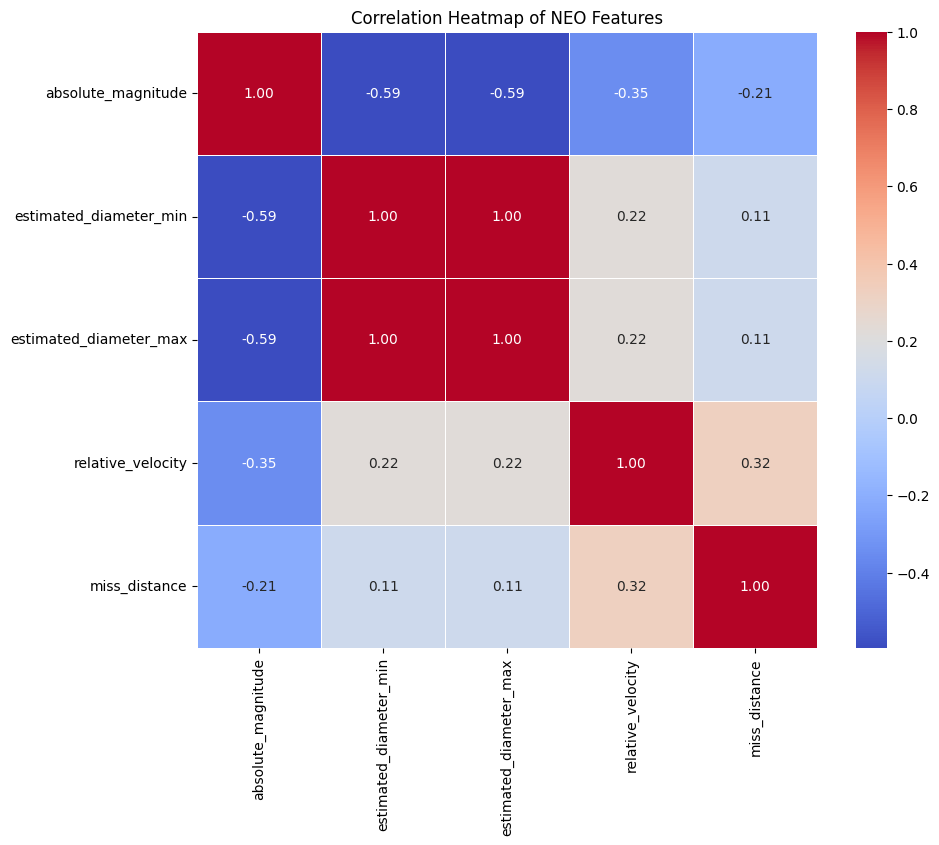

In [20]:
# Compute correlation matrix
correlation_matrix = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                         'relative_velocity', 'miss_distance']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of NEO Features')
plt.show()

### Data Preparation for Modeling
We selected key features (`absolute_magnitude`, `estimated_diameter_min`, `estimated_diameter_max`, `relative_velocity`, `miss_distance`) and the target variable (`is_hazardous`). The data was split into training (80%) and testing (20%) sets using `train_test_split`. Finally, the features were standardized using `StandardScaler` to ensure consistent scaling.

In [22]:
# Selecting features and target variable
features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
            'relative_velocity', 'miss_distance']
target = 'is_hazardous'

X = df[features]
y = df[target]

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing/Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Handling Missing Values and Scaling
Missing values were imputed using the mean of each column with `SimpleImputer`. The imputed data was then normalized using `StandardScaler` to ensure consistent feature scaling for both training and testing sets.

In [24]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalizing/Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### Logistic Regression Model
We initialized and trained a Logistic Regression model using the scaled training data. After making predictions on the test set, we evaluated the model's performance using accuracy and a classification report to summarize precision, recall, and F1-score.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.871732702542874
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59011
        True       0.48      0.07      0.13      8629

    accuracy                           0.87     67640
   macro avg       0.68      0.53      0.53     67640
weighted avg       0.83      0.87      0.83     67640



### Random Forest Model
We initialized and trained a Random Forest classifier using the scaled training data. After making predictions on the test set, we evaluated the model's performance using accuracy and a classification report to summarize precision, recall, and F1-score.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9174748669426375
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     59011
        True       0.71      0.59      0.65      8629

    accuracy                           0.92     67640
   macro avg       0.83      0.78      0.80     67640
weighted avg       0.91      0.92      0.91     67640



### PyCaret Model Comparison
Using PyCaret, we set up the classification environment with the dataset, targeting `is_hazardous`. PyCaret's `compare_models` function was used to evaluate and compare different models to identify the best-performing one. The best model was then finalized, and predictions were made on the dataset, with the results printed out.

In [ ]:
from pycaret.classification import *

# Initialize PyCaret
s = setup(data=df, target='is_hazardous', session_id=42, normalize=True)

# Compare models
best_model = compare_models()

# Finalize the best model
final_model = finalize_model(best_model)

# Make predictions
predictions = predict_model(final_model, data=df)
print(predictions)

### Model Evaluation

#### Logistic Regression
Evaluated accuracy and generated a classification report for the Logistic Regression model.

#### Random Forest
Evaluated accuracy and generated a classification report for the Random Forest model.

#### PyCaret
Evaluated the best PyCaret model using accuracy, classification report, and confusion matrix based on predictions.

In [ ]:
# Logistic Regression Evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(log_reg_report)

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(rf_report)

#Pycaret Evaluation
# Evaluate the best model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions on the test set
predictions = predict_model(final_model, data=df)


# Extract the true labels and predicted labels
y_true = df['is_hazardous']
y_pred = predictions['Label']

# Calculate accuracy
pycaret_accuracy = accuracy_score(y_true, y_pred)

# Generate classification report
pycaret_report = classification_report(y_true, y_pred)

# Generate confusion matrix
pycaret_confusion_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print("PyCaret Model Accuracy:", pycaret_accuracy)
print("\nClassification Report:\n", pycaret_report)
print("\nConfusion Matrix:\n", pycaret_confusion_matrix)

## Summary

In this notebook, we performed the following steps:

### Data Preparation
- **Data Loading**: The dataset `nearest-earth-objects(1910-2024).csv` was loaded into a DataFrame.
- **Data Cleaning**: Missing values and data types were examined. Necessary preprocessing steps, such as handling missing values and data normalization, were applied to ensure the data is ready for modeling.

### Modeling
- **Model 1**: Implemented a logistic regression model. The model was trained and evaluated based on accuracy and other performance metrics.
- **Model 2**: Another classification model was used to compare performance. Metrics were evaluated to determine the best performing model.

### PyCaret
- **PyCaret Setup**: The `setup()` function was initialized without the `silent` argument due to version compatibility. The data was prepared for automated machine learning using PyCaret.
- **Model Comparison**: Various models were compared to identify the best one based on performance metrics.
- **Final Model**: The best model was finalized and used for predictions.

### Evaluation
- **Model Performance**: The performance of different models was evaluated based on accuracy and other relevant metrics. The best-performing model was selected for final predictions.

### Conclusion/Results
- **Findings**: Summarize the key findings from the modeling phase. Mention which model performed the best and any insights gained from the analysis.

### Known Issues
- **Data Quality**: Issues related to missing values or data inconsistencies.
- **Model Limitations**: Any limitations encountered with the models used, such as performance issues or challenges with certain features.

This notebook provides a comprehensive analysis of the dataset, including data preparation, model training, and evaluation. The results offer insights into the effectiveness of different models in predicting hazardous Near-Earth Objects (NEOs).